# AUTHOR: Jagjeet Singh

### importing necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exercise 1: Data Preparation and Preprocessing

### importing data

In [35]:
Demographics=pd.read_csv('DEMO_D.csv')
blood_pressure=pd.read_csv('BPX_D.csv')
Cholestrol=pd.read_csv('TCHOL_D.csv')

In [36]:
Demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN


In [38]:
blood_pressure.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,2.0,NaN,4.0,NaN,2.0
4,31131.0,1.0,827.0,NaN,NaN,2.0


In [40]:
Cholestrol.head()

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


### joining the three dataframes together using seqn as the key 

In [97]:
df=Demographics.merge(blood_pressure,on='SEQN',how='inner',validate='one_to_one').merge(Cholestrol,on='SEQN',how='inner',validate='one_to_one')

### printing few rows of the final data frame

In [181]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,842.0


In [45]:
df.shape

(8086, 18)

### percentage of missing values in ridagemn column

In [367]:
print(round(df['RIDAGEMN'].isnull().sum()*100/df['RIDAGEMN'].shape[0],2),'% values missing in column age at sceening')

1.83 % values missing in column age at sceening


### printing information and statistical description of data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8085
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8086 non-null   float64
 1   SDDSRVYR  8086 non-null   float64
 2   RIDSTATR  8086 non-null   float64
 3   RIAGENDR  8086 non-null   float64
 4   RIDAGEMN  7938 non-null   float64
 5   RIDAGEEX  7917 non-null   float64
 6   RIDAGEYR  8086 non-null   float64
 7   RIDRETH1  8086 non-null   float64
 8   DMDEDUC3  3312 non-null   float64
 9   DMDEDUC2  4773 non-null   float64
 10  DMDSCHOL  3076 non-null   float64
 11  PEASCST1  8086 non-null   float64
 12  PEASCTM1  7805 non-null   float64
 13  PEASCCT1  360 non-null    float64
 14  BPXCHR    356 non-null    float64
 15  BPQ150A   7455 non-null   float64
 16  LBXTC     7360 non-null   float64
 17  LBDTCSI   7360 non-null   float64
dtypes: float64(18)
memory usage: 1.2 MB


In [397]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
count,8086.000000,8086.0,8086.0,8086.000000,7938.000000,7917.000000,8086.000000,8086.000000,3.312000e+03,4773.000000,3076.000000,8086.000000,7805.000000,360.000000,356.000000,7455.000000,7360.000000,7360.000000,8086.000000,8086.000000
mean,36306.897724,4.0,2.0,1.514098,400.234316,400.949476,33.858150,2.825377,7.583635e+00,3.282003,1.365085,1.079520,612.427931,49.138889,88.550562,1.709323,184.471060,4.770417,398.674252,399.732748
std,2982.445660,0.0,0.0,0.499832,261.916565,261.822792,22.720599,1.212358,7.526794e+00,1.297236,0.650956,0.378434,207.804768,38.372353,14.027347,0.454105,42.844203,1.107979,259.759653,259.707098
min,31128.000000,4.0,2.0,1.000000,72.000000,72.000000,6.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,5.000000,1.000000,58.000000,1.000000,78.000000,2.020000,72.000000,72.000000
25%,33737.250000,4.0,2.0,1.000000,182.000000,183.000000,15.000000,1.000000,4.000000e+00,2.000000,1.000000,1.000000,551.000000,4.000000,80.000000,1.000000,155.000000,4.010000,184.000000,185.000000
50%,36311.500000,4.0,2.0,2.000000,315.000000,316.000000,27.000000,3.000000,7.000000e+00,3.000000,1.000000,1.000000,631.000000,56.000000,88.000000,2.000000,179.000000,4.630000,315.000000,325.000000
75%,38878.750000,4.0,2.0,2.000000,596.000000,597.000000,51.000000,4.000000,1.000000e+01,4.000000,2.000000,1.000000,720.000000,99.000000,94.500000,2.000000,209.000000,5.400000,592.000000,592.000000
max,41474.000000,4.0,2.0,2.000000,1019.000000,1019.000000,85.000000,5.000000,9.900000e+01,9.000000,3.000000,3.000000,2679.000000,99.000000,240.000000,2.000000,615.000000,15.900000,1019.000000,1031.000000


## filling null values in column 'RIDAGEMN'

### plotting histogram of the column to get a glance of the age distribution

Text(0.5, 0, 'age of people in months')

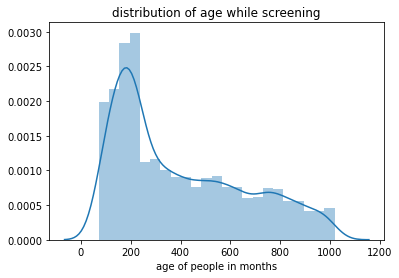

In [411]:
ax=sns.distplot(df['RIDAGEMN'])
ax.set_title('distribution of age while screening')
ax.set_xlabel('age of people in months')

### finding the age of oldest person 

In [380]:
print('Age of oldest person is around',round((df['RIDAGEMN'].max())/12),'years or ',df['RIDAGEMN'].max(),'months')

Age of oldest person is around 85 years or  1019.0 months


### plotting histogram of the ages at screening in years

Text(0.5, 0, 'age of people in years')

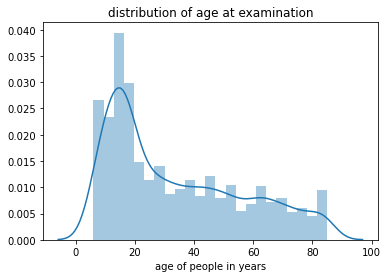

In [410]:
ax=sns.distplot(df['RIDAGEYR'])
ax.set_title('distribution of age at examination')
ax.set_xlabel('age of people in years')

In [378]:
df[df['RIDAGEMN'].isnull()]['RIDAGEYR'].unique()

array([85.])

### all the ages in the year column RIDAGEYR' with corresponding missing values in month column RIDAGEMN' are 85 whereas max age in the month column RIDAGEMN' is 84
### this means all the values in the year column equal to 85 are the imputed values during the observation
### so year column cannot be uesd to fill missing values in the month column

In [200]:
df['AGE_AT_SCREENING']=df['RIDAGEMN'].fillna(df['RIDAGEMN'].median())

### filling null values of 'RIDAGEMN' with the median values as it wont change the skewness of the plot

In [202]:
df['AGE_AT_SCREENING']

0       132.0
1       189.0
2       315.0
3       535.0
4       842.0
        ...  
8081    235.0
8082    148.0
8083    410.0
8084    255.0
8085    200.0
Name: AGE_AT_SCREENING, Length: 8086, dtype: float64

Text(0.5, 0, 'age of people in months')

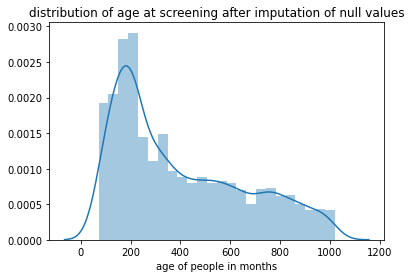

In [409]:
ax=sns.distplot(df['AGE_AT_SCREENING'])
ax.set_title('distribution of age at screening after imputation of null values')
ax.set_xlabel('age of people in months')

## filling null values in 'RIDAGEEX' column

### plotting histogram of 'RIDAGEEX' to get a glance of the distribution

Text(0.5, 0, 'age of people in months')

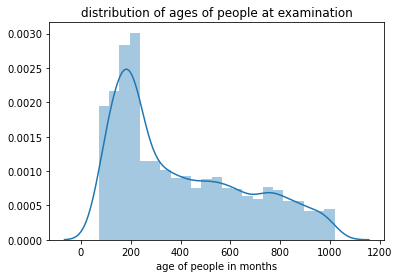

In [408]:
ax=sns.distplot(df['RIDAGEEX'])
ax.set_title('distribution of ages of people at examination')
ax.set_xlabel('age of people in months')

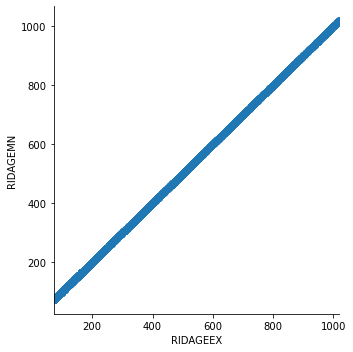

In [204]:
sns.lmplot(x='RIDAGEEX',y='RIDAGEMN',data=df)

### age at examination and age at screening seems to have good correlation lets check further with pearson co-relation

In [412]:
from scipy.stats import pearsonr
pearson_coef,p_value=pearsonr(data['RIDAGEEX'],data['RIDAGEMN'])
print(f'The Pearson Correlation Coefficient is {pearson_coef:.2f} with a P-value of P={p_value}')

The Pearson Correlation Coefficient is 1.00 with a P-value of P=0.0


In [414]:
# using linear regression to fill null values in examination column

In [383]:
lr=LinearRegression()
lr.fit(data[['RIDAGEMN']],data['RIDAGEEX'])
pred=lr.predict(df[['AGE_AT_SCREENING']])

In [387]:
(pred-df['AGE_AT_SCREENING'])[:10]

0    0.821886
1    0.822534
2    0.823966
3    0.826467
4    0.829957
5    0.822579
6    0.830412
7    0.822409
8    0.822852
9    0.821920
Name: AGE_AT_SCREENING, dtype: float64

### the difference of time between screening of person and examination of person comming is in decimals which doesn't make sence as the difference should be only in whole years 

### again checking the difference between screening of person and examination of person of given values

In [252]:
(df['RIDAGEEX']-df['RIDAGEMN']).value_counts()

1.0    4815
0.0    2250
2.0     840
3.0      12
dtype: int64

### as most of people have 1 year of gap between screening and examination lets add 1 year to the the ages at screening to get missing ages of examination

In [394]:
df['AGE_AT_EXAM']=np.where(df['RIDAGEEX'].isnull(),df['AGE_AT_SCREENING']+12,df['RIDAGEEX'])

### transforming education columns to one single column of three categories namely elementary, high school, collage

In [320]:
l=[]
for i,j in zip(df['DMDEDUC3'],df['DMDEDUC2']):
    if i<=12 or j<=2 or i==66:
        l.append('ELEMENTARY')
    elif i in [13,14,15] or j in [3,4]:
        l.append('HIGHSCHOOL')
    elif j in [5]:
        l.append('COLLAGE')
    else:
        l.append(np.nan)

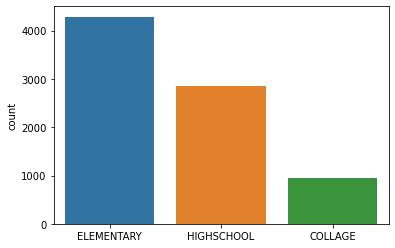

In [321]:
sns.countplot(l)

In [415]:
df['HIGHEST_EDUCATION']=l

In [336]:
df[df['new'].isnull()][['DMDSCHOL','AGE_AT_SCREENING','AGE_AT_EXAM']]

,DMDSCHOL,AGE_AT_SCREENING,AGE_AT_EXAM
2255,NaN,315.0,316.0
2633,NaN,72.0,72.0
3239,NaN,1016.0,1017.0
3247,NaN,315.0,316.0
5552,NaN,493.0,493.0
5912,1.0,216.0,217.0
6856,NaN,947.0,948.0
7284,NaN,898.0,898.0
7538,NaN,704.0,705.0


### filling the null values with elementary as it is most common category and also some of the person with null values are young 

### reading the retired file

In [337]:
retired=pd.read_csv('DEMO_RETIRED.CSV')

In [338]:
retired.head()

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


Text(0.5, 1.0, 'retired/not retired v/s count')

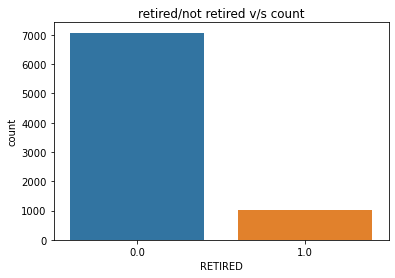

In [425]:
ax=sns.countplot(retired['RETIRED'])
ax.set_title('retired/not retired v/s count')

In [359]:
retired['RETIRED'].value_counts()

0.0    7073
1.0    1013
Name: RETIRED, dtype: int64

### we can fill null values of retired column with 0 as most people are not retired 

In [427]:
retired['RETIRED']=retired['RETIRED'].fillna(0)

## Exercise 2: Model Building

### reading the data file

In [453]:
df=pd.read_csv('claim_prediction.csv')

In [430]:
df.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


### checking if the data is balanced or not

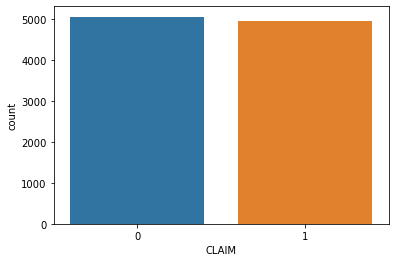

In [431]:
sns.countplot(df['CLAIM'])

### getting the independent and dependent variables and storing them in x and y resp

In [432]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### splitting the data into training and testing sets so that model can be evaluated later

In [433]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### trying different models and checking their accuracy

In [458]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8204285714285714

In [459]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)
model.score(x_train,y_train)

1.0

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8932857142857142

### random forest seems to have best accuracy out of other models but it seems overfitted

### lets predict using random forest and print the classification report 

In [462]:
y_pred=model.predict(x_test)

In [470]:
model.score(x_test,y_test)

0.8796666666666667

In [464]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1533
           1       0.87      0.88      0.88      1467

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



### it does look good

In [ ]:
#printing confusion matrics

In [465]:
confusion_matrix(y_test,y_pred)

array([[1343,  190],
       [ 171, 1296]], dtype=int64)

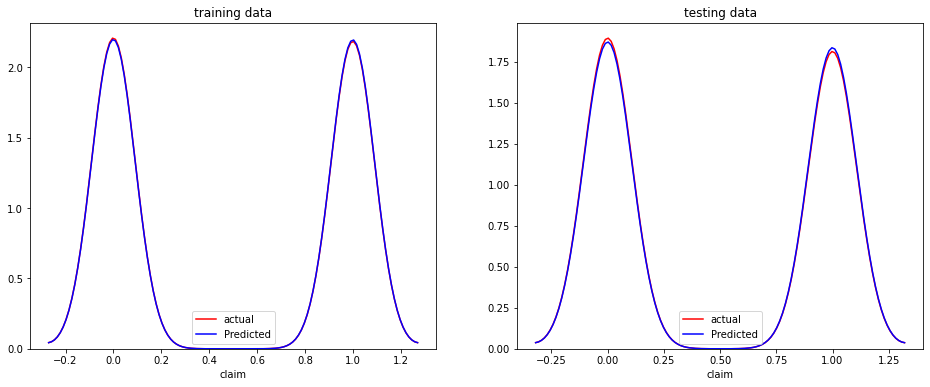

In [469]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(y_train,hist=False,color='r',label='actual',ax=ax[0])
sns.distplot(model.predict(x_train),hist=False,color='b',label='Predicted',ax=ax[0])
ax[0].set_title('training data')
ax[0].set_xlabel('claim')
sns.distplot(y_test,hist=False,color='r',label='actual',ax=ax[1])
sns.distplot(model.predict(x_test),hist=False,color='b',label='Predicted',ax=ax[1])
ax[1].set_title('testing data')
ax[1].set_xlabel('claim')
plt.show()

In [471]:
# the model performs well on seen data and unseen data

### the model seems to be 87% accurate on testing data
### so the model can predict claim  on unseen data with a precision of 87

## Exercise 3:Model Evaluation

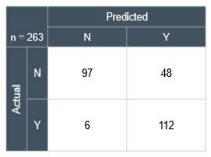

## Exercise 4: Anomaly Detection

In [818]:
#getting data

In [805]:
df=pd.read_csv('anomaly_detection.csv')

In [806]:
df.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


In [819]:
#adding date column

In [824]:
df['date']=pd.date_range('01/01/2016','12/30/2016')

In [825]:
#setting date column as index

In [826]:
df=df.set_index('date')

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-01 to 2016-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CEACC    365 non-null    float64
 1   CCDEF    365 non-null    float64
 2   FAXAE    365 non-null    float64
 3   FBFFD    365 non-null    float64
 4   EDDAB    365 non-null    float64
 5   anomaly  365 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 18.5 KB


In [829]:
#creating temp varialble that contains first 9 months of data

In [830]:
temp=df.loc[:'09/30/2016']

In [831]:
# plotting  reading of CCDEF vs date

In [812]:
fig = px.line(temp, x=temp.index, y="CCDEF")
fig.show()

In [832]:
# issues on the platform CCDEF between 02/14/2016 and 02/21/2016

In [833]:
#plotting other sensors wrt date

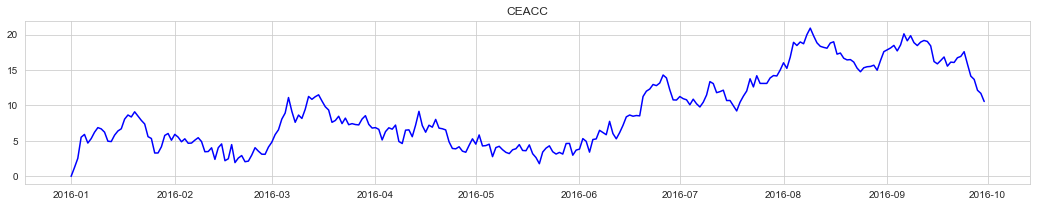

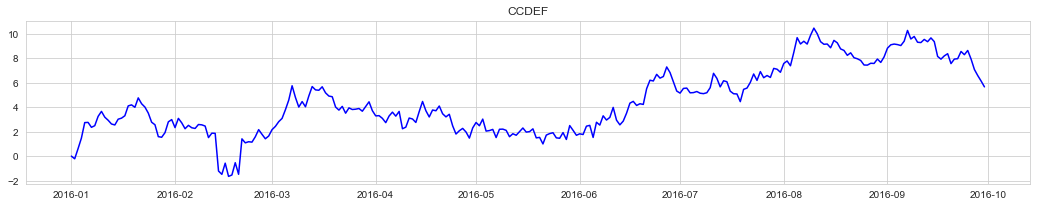

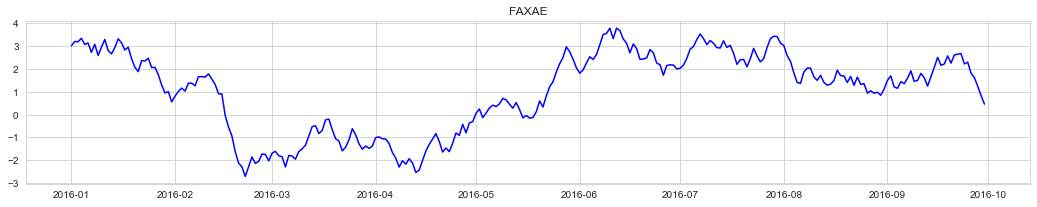

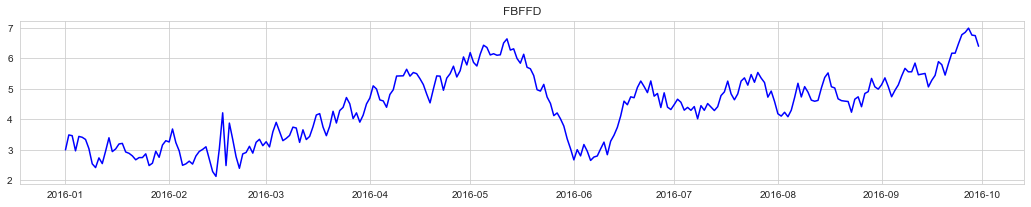

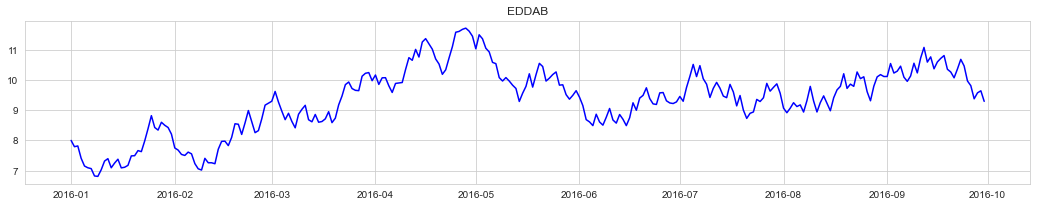

In [813]:
names=temp.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    plt.figure(figsize=(18,3))
    plt.plot(temp[name], color='blue')
    plt.title(name)
    plt.show()

In [834]:
#plotting rolling mean and rolling standard dev

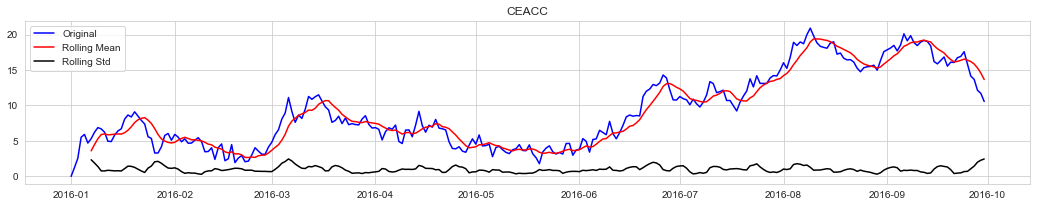

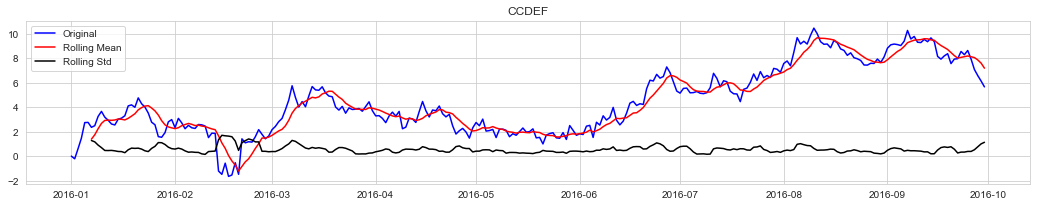

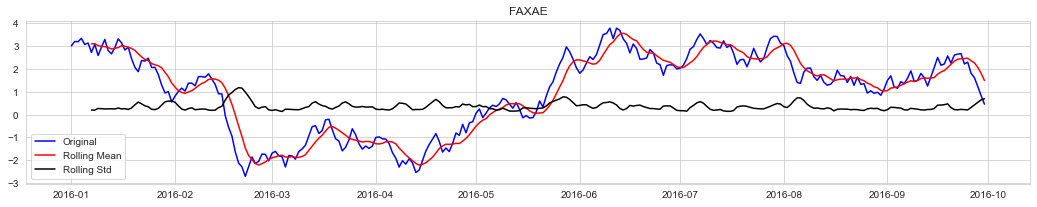

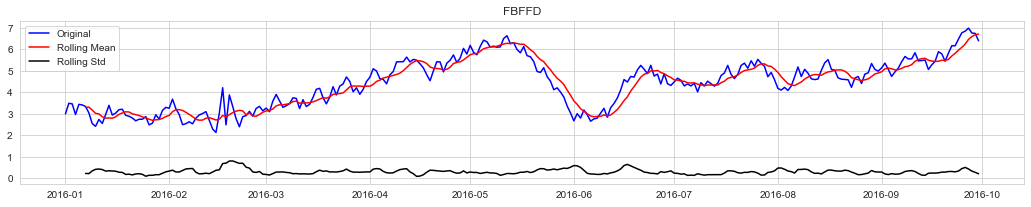

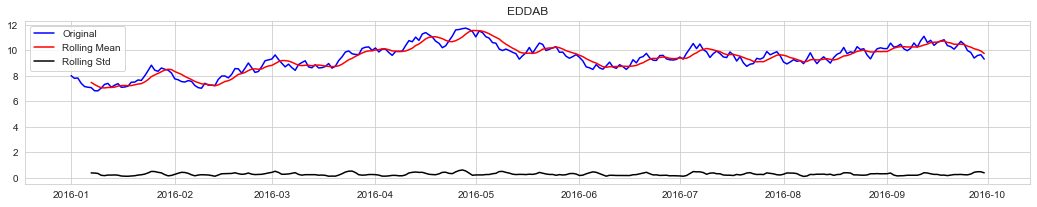

In [814]:
rollmean = temp.rolling(7).mean()
rollstd = temp.rolling(7).std()
for name in names:
    plt.figure(figsize=(18,3))
    plt.plot(temp[name], color='blue', label='Original')
    plt.plot(rollmean[name], color='red', label='Rolling Mean')
    plt.plot(rollstd[name], color='black', label='Rolling Std' )
    plt.legend(loc='best')
    plt.title(name)
    plt.show()

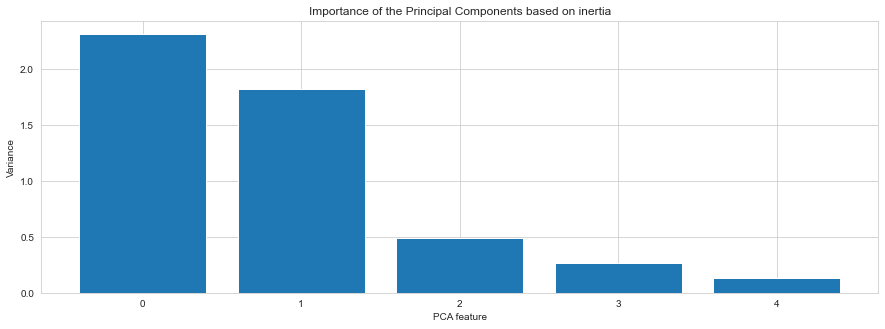

In [815]:
#PCA to decompose components 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
names=df.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
features = range(pca.n_components_)
plt.figure(figsize=(15, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [816]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2'])

In [835]:
#plotting anomaly

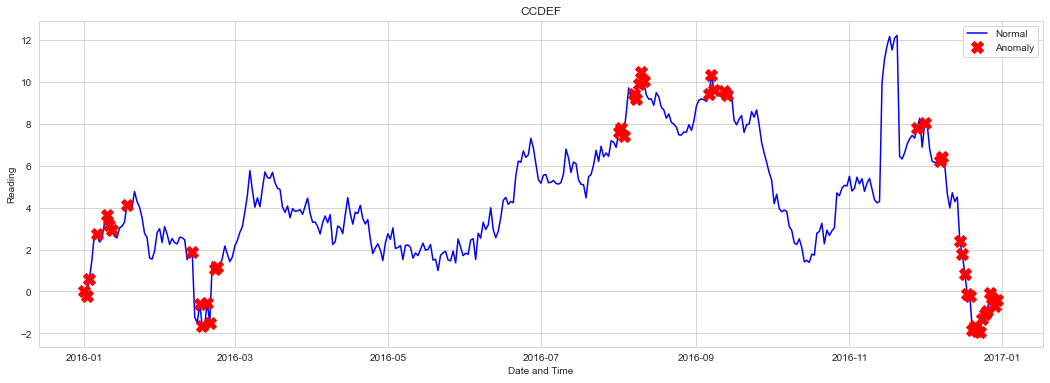

In [817]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly'] = pd.Series(model.predict(principalDf.values))
df['anomaly'] = pd.Series(principalDf['anomaly'].values, index=df.index)
a = df.loc[df['anomaly'] == -1]
plt.figure(figsize=(18,6))
plt.plot(df['CCDEF'], color='blue', label='Normal')
plt.plot(a['CCDEF'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Date and Time')
plt.ylabel('Reading')
plt.title('CCDEF')
plt.legend(loc='best')
plt.show();